<a href="https://colab.research.google.com/github/jdasam/aat3020/blob/main/notebooks/1_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import string


In [2]:
!wget "https://raw.githubusercontent.com/amephraim/nlp/master/texts/J.%20K.%20Rowling%20-%20Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt"


--2024-03-21 06:03:12--  https://raw.githubusercontent.com/amephraim/nlp/master/texts/J.%20K.%20Rowling%20-%20Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439742 (429K) [text/plain]
Saving to: ‘J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt’

J. K. Rowling - Har 100%[===================>] 429.44K  --.-KB/s    in 0.006s  

2024-03-21 06:03:12 (76.1 MB/s) - ‘J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt’ saved [439742/439742]



In [3]:
def remove_punctuation(x):
  return x.translate(''.maketrans('', '', string.punctuation))

def make_tokenized_corpus(corpus):
  out= [ [y.lower() for y in remove_punctuation(sentence).split(' ') if y] for sentence in corpus]
  return [x for x in out if x!=[]]


In [4]:
with open("J. K. Rowling - Harry Potter 1 - Sorcerer's Stone.txt", 'r') as f:
  strings = f.readlines()
sample_text = "".join(strings).replace('\n', ' ').replace('Mr.', 'mr').replace('Mrs.', 'mrs').split('. ')


In [5]:
corpus = make_tokenized_corpus(sample_text)
print(corpus[1]) # Corpus is a list of list of strings (words)

['they', 'were', 'the', 'last', 'people', 'youd', 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', 'because', 'they', 'just', 'didnt', 'hold', 'with', 'such', 'nonsense']


In [6]:
from copy import copy
copy(corpus[1])

['they',
 'were',
 'the',
 'last',
 'people',
 'youd',
 'expect',
 'to',
 'be',
 'involved',
 'in',
 'anything',
 'strange',
 'or',
 'mysterious',
 'because',
 'they',
 'just',
 'didnt',
 'hold',
 'with',
 'such',
 'nonsense']

In [7]:
from tqdm import tqdm

sample_sentence = ['they', 'were', 'the', 'last', 'people', 'youd', 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', 'because', 'they', 'just', 'didnt', 'hold', 'with', 'such', 'nonsense']

word_idx = 7
window_size = 2
selected_center_word = sample_sentence[word_idx]

word_pairs = []

for sample_sentence in tqdm(corpus): # tqdm shows the progress bar of for loop
  for word_idx, word in enumerate(sample_sentence):
    for context_idx in range(-window_size, window_size+1):
      if context_idx == 0: continue
      context_word_idx = word_idx + context_idx
      if context_word_idx >= len(sample_sentence) or context_word_idx < 0: continue
      # print(context_idx, context_word_idx, sample_sentence[word_idx], sample_sentence[context_word_idx])
      word_pair = [word, sample_sentence[context_word_idx]]
      word_pairs.append(word_pair)
len(word_pairs)

100%|██████████| 4682/4682 [00:00<00:00, 8695.04it/s]


282372

In [8]:
word_pairs[1000]

['mixing', 'dudley']

In [9]:
# we have to make vocabulary

total_words = []
for sentence in corpus:
  # print(sentence)
  for word in sentence:
    total_words.append(word)

print(total_words[:100])
# for a in corpus:
#   for b in a:
#     c.append(b)
# always use proper variable name

['harry', 'potter', 'and', 'the', 'sorcerers', 'stone', 'chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr', 'and', 'mrs', 'dursley', 'of', 'number', 'four', 'privet', 'drive', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', 'thank', 'you', 'very', 'much', 'they', 'were', 'the', 'last', 'people', 'youd', 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', 'because', 'they', 'just', 'didnt', 'hold', 'with', 'such', 'nonsense', 'mr', 'dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'grunnings', 'which', 'made', 'drills', 'he', 'was', 'a', 'big', 'beefy', 'man', 'with', 'hardly', 'any', 'neck', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache', 'mrs', 'dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual']


In [10]:
# we have to get the "unique" item among total words
vocab_set = set(total_words)
print(len(total_words), len(vocab_set))
print(vocab_set)

77597 6038
{'bags', 'waiting', 'apologized', 'dratted', 'sword', 'juicy', 'roars', 'money', 'grubby', 'brightly', 'saving', 'pocket', 'pucey', 'leglocker', 'depended', 'skidding', 'payin', 'earned', 'sagged', 'memorize', 'weight', 'gryffindor', 'belonging', 'sunrise', 'pick', 'gun', 'hag', 'madam', 'thrown', 'gingerly', 'sneering', 'weakly', 'changed', 'wicked', 'fences', 'pub', 'dennis', 'gradually', 'flanked', 'disappointed', 'drafty', 'dull', 'covered', 'pretended', 'overtake', 'blossoming', 'myseff', 'malade', 'castle', 'knowing', 'person', 'mckinnons', 'bc', 'zoom', 'credit', 'tells', 'session', 'drawl', 'necessary', 'sister', 'betray', 'wouldn', 'loyal', 'happening', 'dunderhead', 'grudgingly', 'happen', 'turn', 'hidden', 'ideas', 'chatter', 'wailed', 'shhhh', 'mouthed', 'more', 'sleek', 'harbor', 'seamus', 'change', 'bearing', 'diagon', 'petrified', 'spelled', 'furiously', 'unwrap', 'resting', 'boat', 'paler', 'mutely', 'counting', 'wonder', 'knitting', 'says', 'force', 'baronll

In [11]:
# this will make error
# vocab_set[0] # set is not subscriptable because it has no order

vocab = list(vocab_set) # converting set into list, so that we can order the items
# sort the liset
vocab = sorted(vocab)
# vocab.sort()
print(vocab)


['\the', '0', '1', '1473', '1637', '17', '1709', '1945', '2', '3', '31', '382', '4', '90', 'a', 'aaaaaaaaaargh', 'aaaargh', 'aaah', 'aargh', 'aback', 'abbott', 'able', 'abnormal', 'aboard', 'abou', 'about', 'aboutface', 'above', 'absolutely', 'absurd', 'abysmal', 'accept', 'accepted', 'accident', 'accidentally', 'accidents', 'according', 'account', 'accountant', 'ache', 'achieve', 'acid', 'aconite', 'acreeping', 'across', 'act', 'acted', 'acting', 'actually', 'adalbert', 'add', 'added', 'address', 'addressed', 'admirable', 'admirals', 'admired', 'admirers', 'admiring', 'admitted', 'adrian', 'advanced', 'advancing', 'adventure', 'advice', 'advised', 'aff', 'affairs', 'affect', 'afford', 'afraid', 'africa', 'african', 'after', 'afternoon', 'afternoons', 'afterward', 'again', 'against', 'age', 'ages', 'ago', 'agony', 'agree', 'agreed', 'agrippa', 'ah', 'aha', 'ahead', 'ahem', 'ahern', 'air', 'airily', 'airplane', 'ajar', 'alarm', 'alarming', 'alas', 'alberic', 'albus', 'alchemist', 'alche

In [12]:
# how can we filter the vocab by its frequency?
from collections import Counter
word_counter = Counter(total_words)
# word_counter['hundreds']
len(word_counter)

# you can use word counter as dictionary
# In python dictionary, dict.keys() gives keys, and dict.values() give values,
# dict.items() give (key, value)
filtered_vocab = []
minimum_occur = 5
for key, value in word_counter.items():
  if value >= minimum_occur:
    filtered_vocab.append(key)
print(len(filtered_vocab))
filtered_vocab.sort() # you must not declare filtered_vocab = filtered_vocab.sort()

1701


In [13]:
print(filtered_vocab)

['a', 'able', 'abou', 'about', 'above', 'across', 'added', 'adventure', 'afford', 'afraid', 'after', 'afternoon', 'again', 'against', 'age', 'ages', 'ago', 'agreed', 'ah', 'ahead', 'air', 'albus', 'alive', 'all', 'alley', 'allowed', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'an', 'and', 'angrily', 'angry', 'animals', 'another', 'answer', 'anxiously', 'any', 'anymore', 'anyone', 'anythin', 'anything', 'anyway', 'anywhere', 'apart', 'appeared', 'archway', 'are', 'arent', 'arm', 'armor', 'arms', 'around', 'arrived', 'arts', 'as', 'ask', 'asked', 'asking', 'asleep', 'at', 'attention', 'aunt', 'awake', 'away', 'baby', 'back', 'backward', 'bacon', 'bad', 'badly', 'bag', 'bald', 'ball', 'balls', 'bane', 'barely', 'barked', 'baron', 'barrier', 'bathroom', 'be', 'beaming', 'beans', 'bear', 'beard', 'became', 'because', 'become', 'becoming', 'bed', 'bedroom', 'been', 'before', 'began', 'behind', 'being', 'believe', 'believed', 'bell', 'bellowed', 'below', 'beneat

In [14]:
# Filter the word_pairs using the vocab
# word_pairs, filtered_vocab
# word_pairs is a list of [word_a, word_b]

filtered_pairs = []
for pair in tqdm(word_pairs):
  word_a, word_b = pair
  # word_a = pair[0]
  # word_b = pair[1]
  # we will include this pair only if both words are in the vocab
  if word_a in filtered_vocab and word_b in filtered_vocab:
    filtered_pairs.append(pair)



100%|██████████| 282372/282372 [00:09<00:00, 28612.01it/s]


In [15]:
# implement same algorithm with list comprehension
filtered_pairs = [pair for pair in word_pairs
                  if pair[0] in filtered_vocab and pair[1] in filtered_vocab]

In [16]:
len(filtered_pairs), len(word_pairs)

(233046, 282372)

In [17]:
filtered_pairs[1000]

['happily', 'she']

In [18]:
# convert word into index of vocab
filtered_vocab.index('happily')

index_pairs = []
for word_a, word_b in tqdm(filtered_pairs):
  word_a_idx = filtered_vocab.index(word_a)
  word_b_idx = filtered_vocab.index(word_b)
  index_pairs.append([word_a_idx, word_b_idx])
len(index_pairs)

100%|██████████| 233046/233046 [00:07<00:00, 32927.68it/s]


233046

In [19]:
filtered_vocab[100]

'behind'

In [20]:
# we can make it faster
# use dictionary to find the index of string

# adict['behind'] = 100
# tok2idx = {}
# for idx, word in enumerate(filtered_vocab):
#   tok2idx[word] = idx # word becomes key, idx becomes value

tok2idx = {word: idx for idx, word in enumerate(filtered_vocab)}

tok2idx['harry']

613

In [21]:
index_pairs = []
for word_a, word_b in tqdm(filtered_pairs):
  word_a_idx = tok2idx[word_a]
  word_b_idx = tok2idx[word_b]
  index_pairs.append([word_a_idx, word_b_idx])


100%|██████████| 233046/233046 [00:00<00:00, 534948.12it/s]


In [22]:
# Why we don't need idx2tok?

def convert_idx_pairs_to_string(pair):
  # pair: [int, int]
  idxa, idxb= pair
  return filtered_vocab[idxa], filtered_vocab[idxb]
convert_idx_pairs_to_string(index_pairs[0])

('harry', 'potter')

In [23]:
# we have to make random vectors for each word in the vocab
# we also have to decide the dimension of the vector

dim = 8
vocab_size = len(filtered_vocab)

word_vectors = torch.randn(vocab_size, dim) / 4
word_vectors, word_vectors.shape

(tensor([[-0.0906, -0.2238, -0.0839,  ..., -0.0267, -0.2409,  0.1863],
         [ 0.0709, -0.3797, -0.0561,  ..., -0.3091,  0.3991,  0.4211],
         [ 0.2563,  0.1895, -0.2895,  ..., -0.0754, -0.1098, -0.0347],
         ...,
         [-0.1012, -0.0911,  0.7485,  ..., -0.1317, -0.0680,  0.0335],
         [ 0.1589,  0.2556, -0.0191,  ..., -0.0985,  0.0516, -0.0026],
         [-0.0092,  0.1469,  0.3178,  ...,  0.3866, -0.5609, -0.1784]]),
 torch.Size([1701, 8]))

In [24]:
# what is the vector for harry?
idx_of_harry = tok2idx['harry']
print(idx_of_harry)
vector_of_harry = word_vectors[idx_of_harry]
vector_of_harry

613


tensor([ 0.5985,  0.1720, -0.1254,  0.1329,  0.2198, -0.1788, -0.2152, -0.4198])

In [25]:
filtered_pairs[0], index_pairs[0]

(['harry', 'potter'], [613, 1085])

In [26]:
torch.set_printoptions(sci_mode=False)
vector_of_potter = word_vectors[tok2idx['potter']]

print(vector_of_harry)
print(vector_of_potter)
print(vector_of_harry * vector_of_potter)
print(sum(vector_of_harry * vector_of_potter))

tensor([ 0.5985,  0.1720, -0.1254,  0.1329,  0.2198, -0.1788, -0.2152, -0.4198])
tensor([-0.1530,  0.1913,  0.1130,  0.3143, -0.1625, -0.2138, -0.2011,  0.4236])
tensor([-0.0916,  0.0329, -0.0142,  0.0418, -0.0357,  0.0382,  0.0433, -0.1778])
tensor(-0.1631)


## Dot Product
- Assume we have two vectors $a$ and $b$.
  - $a = [a_1, a_2, a_3, a_4, ..., a_n]$
  - $b = [b_1, b_2, b_3, b_4, ..., b_n]$
- $a \cdot b$ = $\sum _{i=1}^n a_ib_i$  = $a_1b_1 + a_2b_2 + a_3b_3 + a_4b_4 + ... + a_nb_n$


In [27]:
# calculate P(potter|harry)

vector_of_potter = word_vectors[tok2idx['potter']]
vector_of_harry, vector_of_potter

dot_product_value_between_potter_harry = torch.dot(vector_of_harry, vector_of_potter)
dot_product_value_between_potter_harry

tensor(-0.1631)

In [28]:
# we can get the dot product value for every other words in the vocab
# to get  P(word | harry)
word_dot_dict = {}
for word in filtered_vocab:
  word_vector = word_vectors[tok2idx[word]]
  dot_product_value = torch.dot(vector_of_harry, word_vector)
  word_dot_dict[word] = dot_product_value.item()

word_dot_dict

{'a': -0.24207717180252075,
 'able': -0.18632148206233978,
 'abou': 0.2558615803718567,
 'about': 0.28629082441329956,
 'above': 0.16446271538734436,
 'across': -0.13690152764320374,
 'added': -0.13706232607364655,
 'adventure': 0.050604138523340225,
 'afford': -0.11171397566795349,
 'afraid': 0.18854795396327972,
 'after': -0.0340675413608551,
 'afternoon': 0.09040982276201248,
 'again': 0.1323578953742981,
 'against': 0.21582363545894623,
 'age': -0.23241974413394928,
 'ages': -0.47512272000312805,
 'ago': -0.19268126785755157,
 'agreed': 0.10191365331411362,
 'ah': -0.07317717373371124,
 'ahead': -0.04304295778274536,
 'air': -0.2504482865333557,
 'albus': 0.13118821382522583,
 'alive': 0.30798667669296265,
 'all': -0.09576854109764099,
 'alley': -0.23909136652946472,
 'allowed': -0.13903012871742249,
 'almost': -0.029642552137374878,
 'alone': -0.281911164522171,
 'along': 0.09853286296129227,
 'already': -0.005838505923748016,
 'also': 0.12318174540996552,
 'although': 0.076120533

In [ ]:
from math import exp
# we have to convert our prediction into probability distribution
# P(word|harry)
# sum of [P(a|harry), ..., P(potter|harry), ... P(ron|harry), ... ] = 1
# current dot product value is any real number, sometimes called as logit
# logit from logistic regression. Some values that are not yet converted to 0~1
# or value before sigmoid function

# every probability should be in range (0, 1) (greater than 0, smaller than 1)
# this can be handled by taking exponential of dot product values, divided by total sum
# This function is called Softmax

# Why we use exponential?
# Because we want to make every probability in positive range
# while preserving the order

word_exp_dict = {}
sum_exp_value = 0
for key, value in word_dot_dict.items(): # item is (key, value)
  exp_value = exp(value)
  word_exp_dict[key] = exp_value
  sum_exp_value += exp_value

word_prob_dict = {}
for key, value in word_exp_dict.items(): # item is (key, value)
  word_prob_dict[key] = value / sum_exp_value

word_exp_dict,
# print(sum_exp_value)
word_prob_dict

In [30]:
word_prob_dict['potter'] #P(potter|harry)

0.0004888724600192055

## Matrix Multiplication as Dot Product
![img](https://mkang32.github.io/images/python/khan_academy_matrix_product.png)

In [31]:
# get dot product result for every word in the vocabulary
print(vector_of_harry.shape, word_vectors.shape)

# first, make vector_of_harry into matrix format
mat_of_harry = vector_of_harry.unsqueeze(0)
print(vector_of_harry.shape, mat_of_harry.shape, vector_of_harry, mat_of_harry, )
print(word_vectors.T.shape)

# do matrix multiplication
mm_result = torch.mm(mat_of_harry, word_vectors.T) #mm means matrix multiplication
mm_result.shape # (1 x 8) x (8 x 1701) = (1 x 1701)


torch.Size([8]) torch.Size([1701, 8])
torch.Size([8]) torch.Size([1, 8]) tensor([ 0.5985,  0.1720, -0.1254,  0.1329,  0.2198, -0.1788, -0.2152, -0.4198]) tensor([[ 0.5985,  0.1720, -0.1254,  0.1329,  0.2198, -0.1788, -0.2152, -0.4198]])
torch.Size([8, 1701])


torch.Size([1, 1701])

In [32]:
word_dot_dict['potter'], mm_result[0, tok2idx['potter']].item()


(-0.16310632228851318, -0.16310632228851318)

In [33]:
# convert dot product result into exponential
exp_mm_result = torch.exp(mm_result)
word_exp_dict['potter'], exp_mm_result[0, tok2idx['potter']].item()


(0.8495008627370388, 0.849500834941864)

In [34]:
# get the sum of exponential
print(exp_mm_result.shape)
sum_exp_mm = torch.sum(exp_mm_result, dim=1)
sum_exp_mm

torch.Size([1, 1701])


tensor([1737.6738])

In [35]:
# divide exponential value with sum
prob_mm = exp_mm_result / sum_exp_mm

word_prob_dict['potter'], prob_mm[0, tok2idx['potter']].item()

(0.0004888724600192055, 0.0004888724070042372)

In [64]:
def get_probs(query_vectors, entire_vectors):
  assert query_vectors.ndim == 2
  assert entire_vectors.ndim == 2
  assert query_vectors.shape[1] == entire_vectors.shape[1], 'each vector size has to match'

  mm_result = torch.mm(query_vectors, entire_vectors.T)
  exp_value = torch.exp(mm_result)
  sum_value = torch.sum(exp_value, dim=1, keepdim=True)
  # print(exp_value.shape, sum_value.shape)
  # print(sum_value)
  prob = exp_value / sum_value
  return prob

# get_probs(mat_of_harry, word_vectors)
mat_of_harry_potter = torch.stack([vector_of_harry, vector_of_potter], dim=0)
print(mat_of_harry_potter.shape)
probs = get_probs(mat_of_harry_potter, word_vectors)

torch.sum(probs[1, : ]), torch.sum(probs[0, : ])

torch.Size([2, 8])


(tensor(1.0000), tensor(1.))

In [43]:
# Now we can train the word2vec

# Let's think about training pairs
index_pairs # this is our dataset. It's list of list of two integer
# two integer means a pair of neighboring words

# Training set and Test set
# To validate that our model can solve 'unseen' problems
# So we have to split the dataset before training.

# To randomly split the dataset, we will first shuffle the dataset
print(index_pairs[:10])
import random
# random.shuffle(index_pairs) # this will shuffle the list items
print(index_pairs[:10])
print(len(index_pairs))

train_set = index_pairs[:200000]
test_set = index_pairs[200000:]

[[602, 705], [214, 712], [1604, 841], [35, 870], [1688, 919], [588, 1162], [1676, 1414], [1579, 624], [276, 692], [995, 1669]]
[[602, 705], [214, 712], [1604, 841], [35, 870], [1688, 919], [588, 1162], [1676, 1414], [1579, 624], [276, 692], [995, 1669]]
233046


In [44]:
len(train_set), len(test_set)

(200000, 33046)

In [84]:
# making batch from train_set
# Batch is a set of training samples, that are calculated together
# And also we update the model after one single batch

batch_size = 128 # we will calculate 64 samples in a single time
current_sample_idx = 0
dim = 32
word_vectors = torch.randn(vocab_size, dim) / 4
word_vectors.requires_grad = True
lr = 0.01
loss_record = []
num_epochs = 10

for epoch in tqdm(range(num_epochs)):
  for current_sample_idx in tqdm(range(0, len(train_set), batch_size), leave=False):
    train_batch = train_set[current_sample_idx:current_sample_idx + batch_size]
    query_word_ids = [pair[0] for pair in train_batch]
    query_vectors = word_vectors[query_word_ids]

    probs = get_probs(query_vectors, word_vectors) # shape 64, 1701
    # probs[31, 1507] means probability of 1507th words appearing for given 31st query word
    # which is actually query_word_ids[31]-th word in the vocabulary

    # Then, we have to select the probabilities that we have to maximize
    target_word_ids = [pair[1] for pair in train_batch]
    # print(train_batch)
    # print(target_word_ids)
    target_probs = probs[torch.arange(len(target_word_ids)), len(target_word_ids)]

    target_loss = -torch.log(target_probs + 1e-8) # negative log-likelihood
    loss = target_loss.mean()
    loss.backward() # do backpropagation and calculate gradient

    word_vectors.data -= word_vectors.grad * lr # update the parameters
    word_vectors.grad = None # reset the gradient
    loss_record.append(loss.item())
    # print(train_batch, len(train_batch))
    # print(query_word_ids)
    # print(query_vectors)

100%|██████████| 10/10 [01:13<00:00,  7.37s/it]


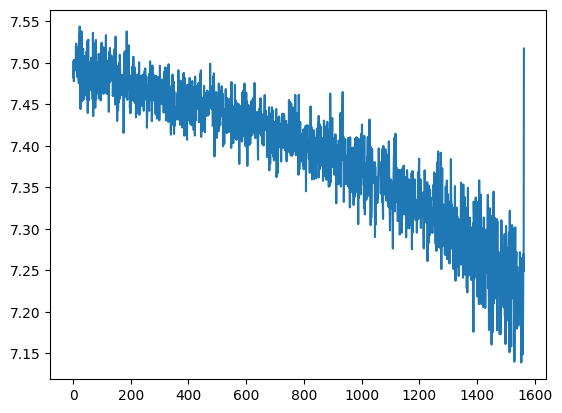

In [83]:
import matplotlib.pyplot as plt
plt.plot(loss_record)

In [79]:
word_vectors.grad

tensor([[    -0.0000,     -0.0000,      0.0000,  ...,      0.0000,
              0.0000,      0.0000],
        [    -0.0000,     -0.0000,      0.0000,  ...,      0.0000,
              0.0001,     -0.0000],
        [    -0.0000,     -0.0000,      0.0000,  ...,      0.0000,
              0.0001,      0.0000],
        ...,
        [    -0.0000,     -0.0000,      0.0000,  ...,      0.0000,
              0.0000,      0.0000],
        [    -0.0000,     -0.0000,      0.0000,  ...,      0.0000,
              0.0000,     -0.0000],
        [    -0.0000,     -0.0000,      0.0000,  ...,      0.0000,
              0.0000,     -0.0000]])

In [75]:
-torch.log(target_probs + 1e-8)

tensor([7.3258, 7.4563, 7.4379, 7.3447, 7.6860, 7.4062, 7.5989, 7.3350, 7.5699,
        7.4700, 7.5151, 7.4063, 7.3397, 7.5448, 7.4350, 7.3172, 7.2921, 7.3444,
        7.6182, 7.2178, 7.5712, 7.3219, 7.4003, 7.1655, 7.4350, 7.4285, 7.6903,
        7.2831, 7.2227, 7.5023, 7.4321, 7.3219, 7.8333, 7.3779, 7.6608, 7.1878,
        7.7082, 7.0525, 7.3557, 7.3728, 7.4285, 7.4998, 7.4285, 7.4329, 7.3795,
        7.3172, 7.1593, 7.4343, 7.6860, 7.5311, 7.3483, 7.4596, 7.4575, 7.7399,
        7.4285, 7.1878, 7.6402, 7.4779, 7.7254, 7.4062, 7.3382, 7.4249, 7.3219,
        7.3172])

In [70]:
probs[torch.arange(len(target_word_ids)), target_word_ids].shape

torch.Size([64, 64])

In [72]:
torch.arange(len(target_word_ids))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [71]:
# you can slice or index tensors by giving pair of index in each dimension
probs[[0, 1, 2, 3, 4], [705, 712, 841, 870, 919]]

tensor([0.0005, 0.0004, 0.0005, 0.0007, 0.0006])

In [60]:
probs

tensor([[0.0007, 0.0006, 0.0005,  ..., 0.0005, 0.0005, 0.0006],
        [0.0005, 0.0005, 0.0007,  ..., 0.0006, 0.0007, 0.0006],
        [0.0006, 0.0008, 0.0006,  ..., 0.0006, 0.0005, 0.0005],
        ...,
        [0.0005, 0.0006, 0.0005,  ..., 0.0006, 0.0005, 0.0006],
        [0.0005, 0.0006, 0.0004,  ..., 0.0008, 0.0005, 0.0007],
        [0.0006, 0.0008, 0.0005,  ..., 0.0005, 0.0005, 0.0006]])

In [55]:
query_word_ids[:10]
# query_vectors[3] == word_vectors[35] # == word_vectors[query_word_ids[3]]
test_idx = 35
(query_vectors[test_idx] == word_vectors[query_word_ids[test_idx]]).all()

tensor(True)

In [49]:
word_vectors.shape, word_vectors


(torch.Size([1701, 8]),
 tensor([[-0.0906, -0.2238, -0.0839,  ..., -0.0267, -0.2409,  0.1863],
         [ 0.0709, -0.3797, -0.0561,  ..., -0.3091,  0.3991,  0.4211],
         [ 0.2563,  0.1895, -0.2895,  ..., -0.0754, -0.1098, -0.0347],
         ...,
         [-0.1012, -0.0911,  0.7485,  ..., -0.1317, -0.0680,  0.0335],
         [ 0.1589,  0.2556, -0.0191,  ..., -0.0985,  0.0516, -0.0026],
         [-0.0092,  0.1469,  0.3178,  ...,  0.3866, -0.5609, -0.1784]]))

In [37]:
word_idx, context_word_idx, len(sample_sentence)

(13, 15, 14)